<a href="https://colab.research.google.com/github/0raghad/churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# churn

Use the "Run" button to execute the code.

In [1]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alharbiraghad
Your Kaggle Key: ··········


100%|██████████| 172k/172k [00:00<00:00, 45.1MB/s]

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
import math

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [120]:
df = pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [121]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis and Data Cleaning

In [122]:
df.drop(columns='customerID', inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


we can see that the `TotalCharges` have the wrong data type so we will change it to numeric data type.


In [124]:
# Object values
for x in df.columns:
   if df[x].dtype == 'object':
      print(x, ': ',df[x]. nunique(),' unique values : ',df[x].unique())

gender :  2  unique values :  ['Female' 'Male']
Partner :  2  unique values :  ['Yes' 'No']
Dependents :  2  unique values :  ['No' 'Yes']
PhoneService :  2  unique values :  ['No' 'Yes']
MultipleLines :  3  unique values :  ['No phone service' 'No' 'Yes']
InternetService :  3  unique values :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  3  unique values :  ['No' 'Yes' 'No internet service']
OnlineBackup :  3  unique values :  ['Yes' 'No' 'No internet service']
DeviceProtection :  3  unique values :  ['No' 'Yes' 'No internet service']
TechSupport :  3  unique values :  ['No' 'Yes' 'No internet service']
StreamingTV :  3  unique values :  ['No' 'Yes' 'No internet service']
StreamingMovies :  3  unique values :  ['No' 'Yes' 'No internet service']
Contract :  3  unique values :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  2  unique values :  ['Yes' 'No']
PaymentMethod :  4  unique values :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (aut

In [125]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')

In [126]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [127]:
df.dropna(inplace=True)

In [128]:
# replace redundant values
df.replace({'No phone service':'No',
              'No internet service':'No'},
               inplace=True)

df['SeniorCitizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)

###   Visualization

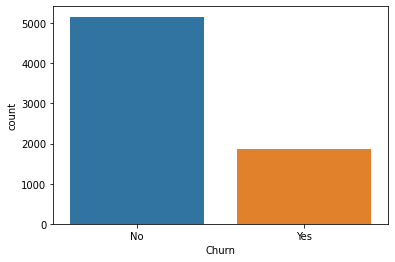

In [129]:
sns.countplot(x='Churn', data=df)

In [130]:
def percentage_stacked_plot(columns_to_plot):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
 
    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
  
        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.62, 0.62, 0.62),
                  title='Churn', fancybox=True)


        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

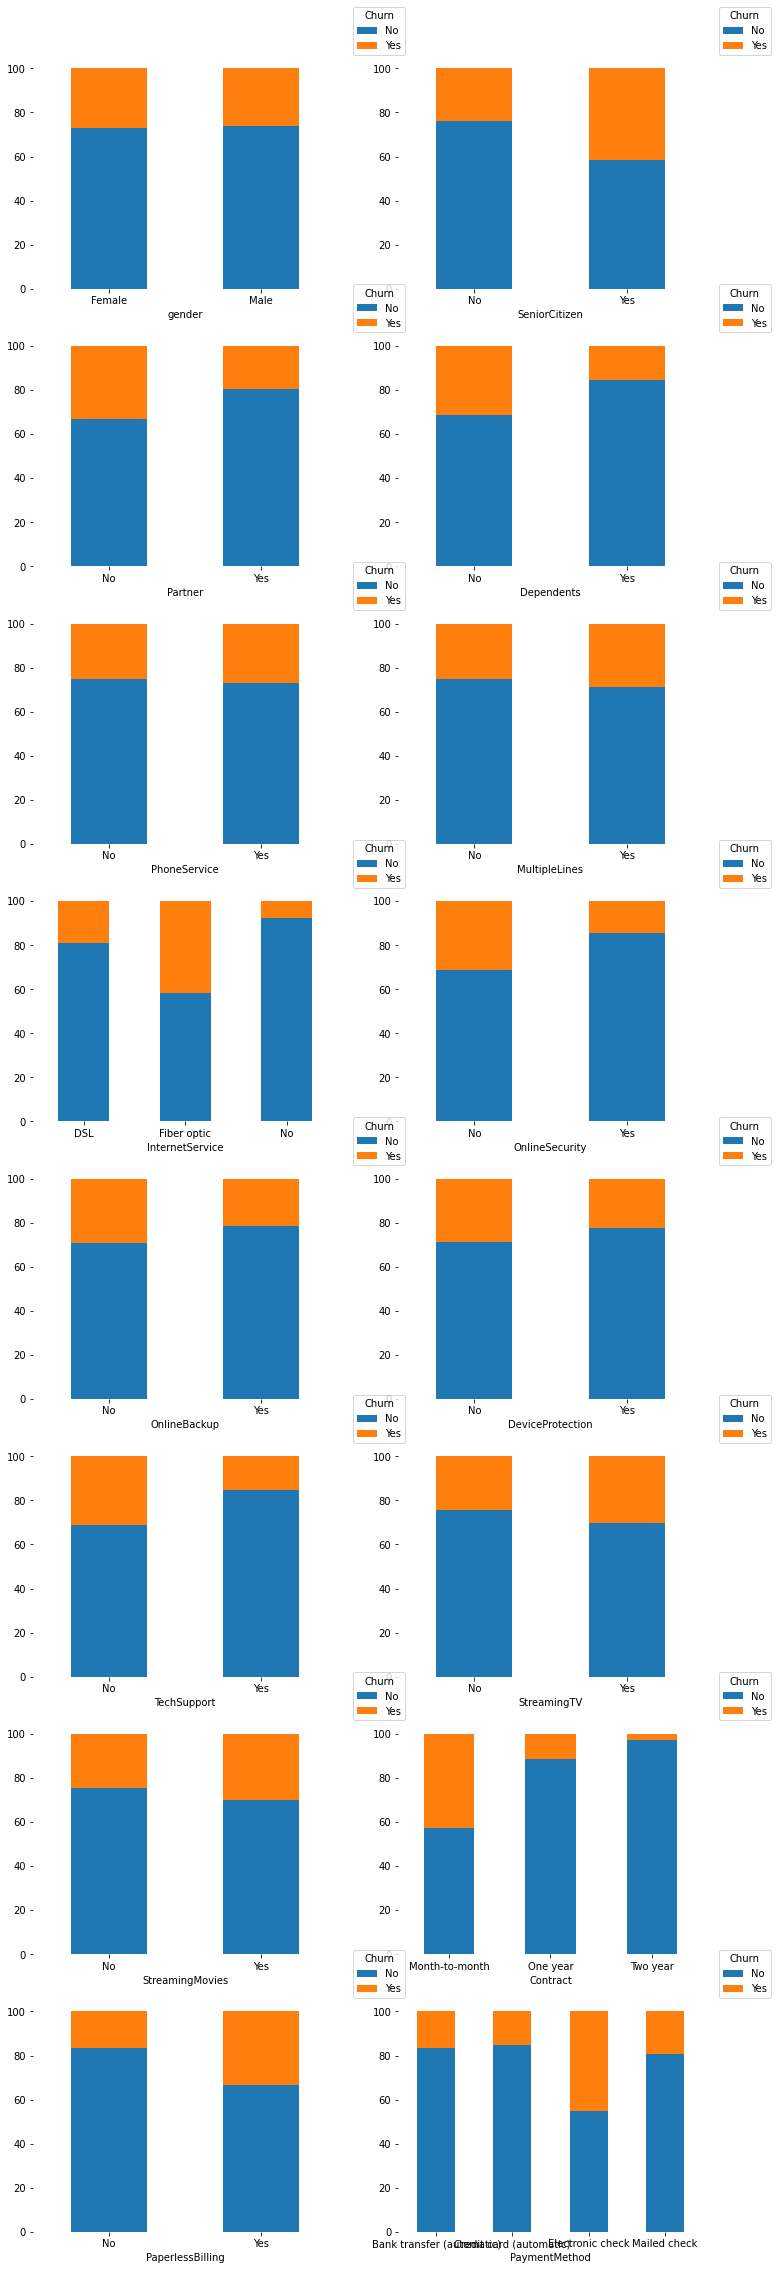

In [131]:
# demographic column names
column_object = [x for x in df.columns if df[x].dtype == 'object']
column_object.remove('Churn')
column_numerical = [x for x in df.columns if df[x].dtype != 'object']
# stacked plot of demographic columns
percentage_stacked_plot(column_object)

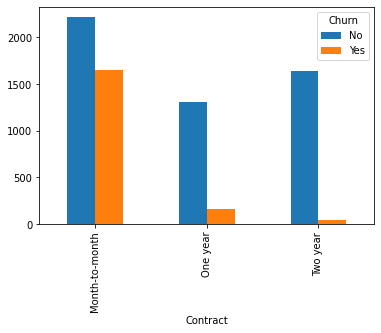

In [132]:
freq=pd.crosstab(df.Contract, df.Churn)
freq.plot(kind='bar')

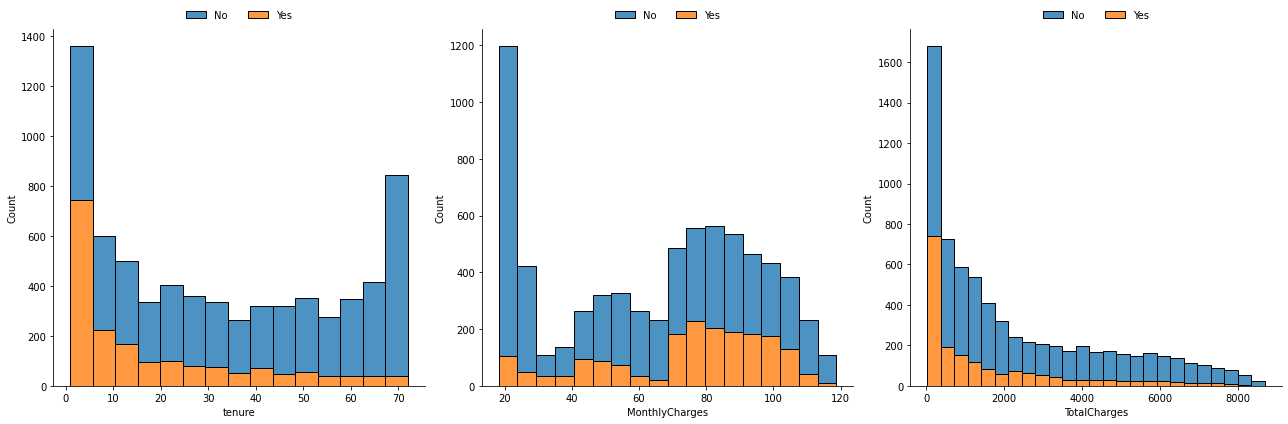

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=df, x=col, hue='Churn', multiple='stack', ax=ax[i], alpha=0.8)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()
plt.show()

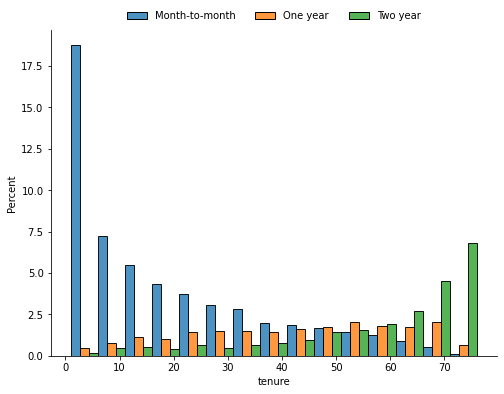

In [134]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=df, x='tenure', hue='Contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  
plt.show()

###  Data Preprocessing

In [135]:
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df[column] = df[column].map({'Female': 1, 'Male': 0})
    else: 
        df[column] = df[column].map({'Yes': 1, 'No': 0}) 

In [136]:
df = pd.get_dummies(df, columns = [x for x in df.columns if df[x].dtype == 'object'] )

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   MonthlyCharges                           7032 non-null   float64
 7   TotalCharges                             7032 non-null   float64
 8   Churn                                    7032 non-null   int64  
 9   SeniorCitizen_No                         7032 non-null   uint8  
 10  SeniorCitizen_Yes                        7032 no

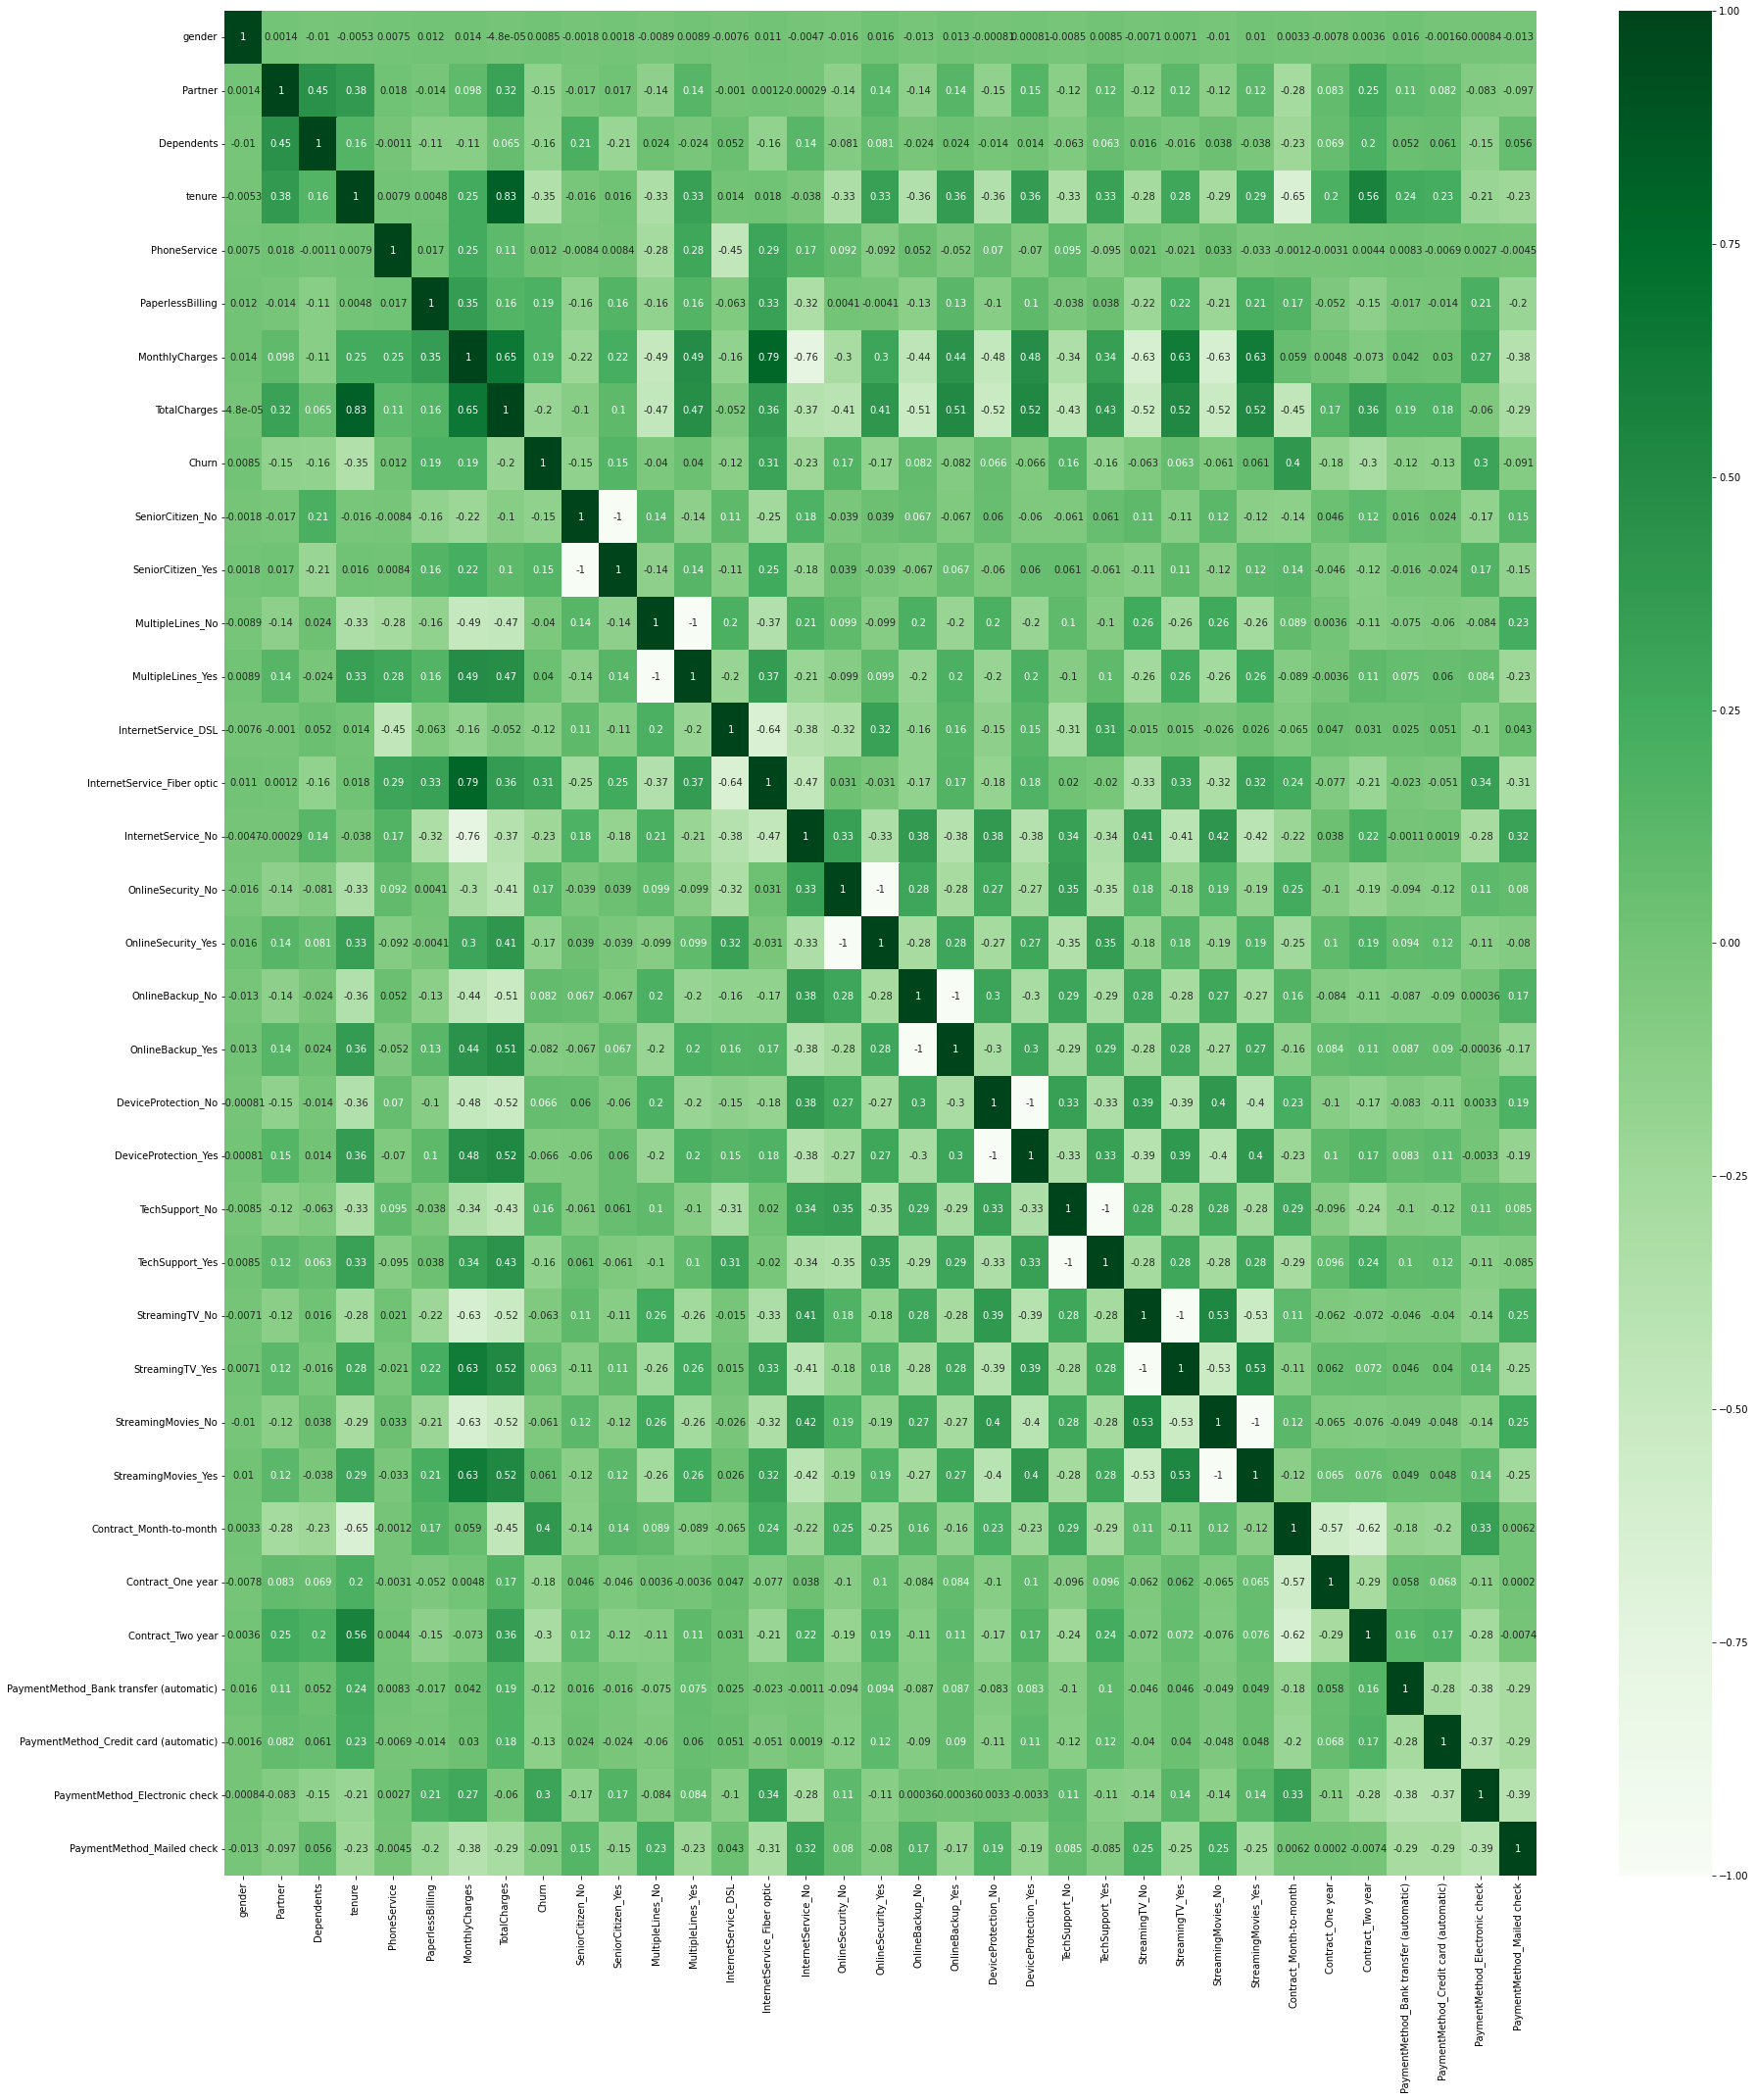

In [138]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,35))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='Greens')

In [139]:
#Correlation with output variable
cor_target = abs(corrmat["Churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

tenure                            0.354049
Churn                             1.000000
InternetService_Fiber optic       0.307463
Contract_Month-to-month           0.404565
Contract_Two year                 0.301552
PaymentMethod_Electronic check    0.301455
Name: Churn, dtype: float64

In [140]:
new_df = df[['InternetService_Fiber optic','PaymentMethod_Electronic check', 'Contract_Two year', 'Contract_Month-to-month','tenure']]

In [165]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X = StandardScaler().fit_transform(X)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1234, stratify=y)

In [167]:
print('X shape\t:', X.shape)
print('y shape\t:', y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape	: (7032, 34)
y shape	: (7032,)

X_train shape	: (5625, 34)
y_train shape	: (5625,)

X_test shape	: (1407, 34)
y_test shape	: (1407,)


In [179]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [180]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
evaluate(model_lr, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3707  423]
 [ 645  850]]
ACCURACY SCORE:
0.8101
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.851792     0.667714  0.810133     0.759753      0.802868
recall        0.897579     0.568562  0.810133     0.733070      0.810133
f1-score      0.874086     0.614162  0.810133     0.744124      0.805004
support    4130.000000  1495.000000  0.810133  5625.000000   5625.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[927 106]
 [191 183]]
ACCURACY SCORE:
0.7889
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829159    0.633218  0.788913     0.731189      0.777075
recall        0.897386    0.489305  0.788913     0.693346      0.788913
f1-score      0.861925    0.552036  0.788913     0.706980      0.779552
support    1033.000000  374.000000  0.788913  1407.000000   1407.000000


In [181]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
evaluate(model_rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[4124    6]
 [   5 1490]]
ACCURACY SCORE:
0.9980
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998789     0.995989  0.998044     0.997389      0.998045
recall        0.998547     0.996656  0.998044     0.997601      0.998044
f1-score      0.998668     0.996322  0.998044     0.997495      0.998045
support    4130.000000  1495.000000  0.998044  5625.000000   5625.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[939  94]
 [221 153]]
ACCURACY SCORE:
0.7761
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.809483    0.619433  0.776119     0.714458      0.758965
recall        0.909003    0.409091  0.776119     0.659047      0.776119
f1-score      0.856361    0.492754  0.776119     0.674557      0.759709
support    1033.000000  374.000000  0.776119  1407.000000   1407.000000


In [182]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3781  349]
 [ 620  875]]
ACCURACY SCORE:
0.8277
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.859123     0.714869  0.827733     0.786996      0.820784
recall        0.915496     0.585284  0.827733     0.750390      0.827733
f1-score      0.886414     0.643619  0.827733     0.765017      0.821885
support    4130.000000  1495.000000  0.827733  5625.000000   5625.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[944  89]
 [194 180]]
ACCURACY SCORE:
0.7989
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.829525    0.669145  0.798863     0.749335      0.786894
recall        0.913843    0.481283  0.798863     0.697563      0.798863
f1-score      0.869645    0.559876  0.798863     0.714760      0.787304
support    1033.000000  374.000000  0.798863  1407.000000   1407.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

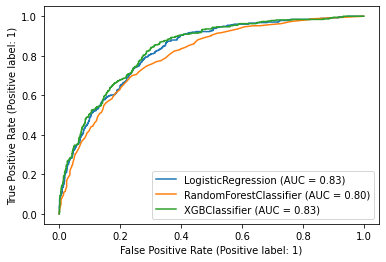

In [186]:
from sklearn.metrics import plot_roc_curve
classifiers = [model_lr, model_rf , xgb_clf]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)